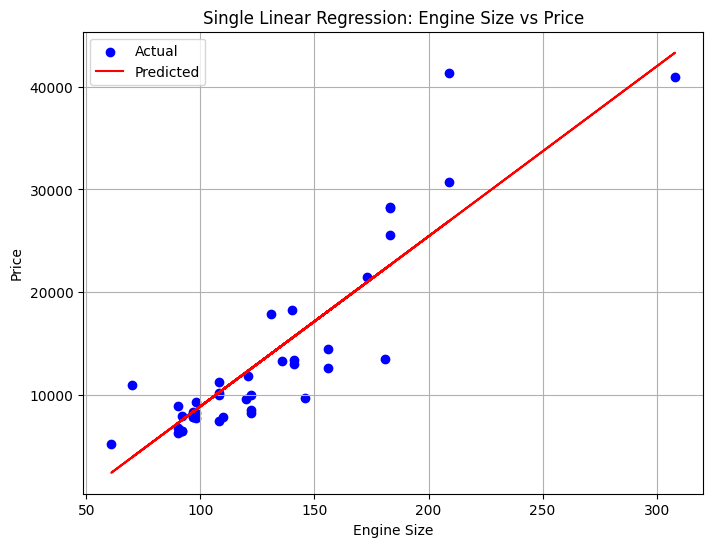

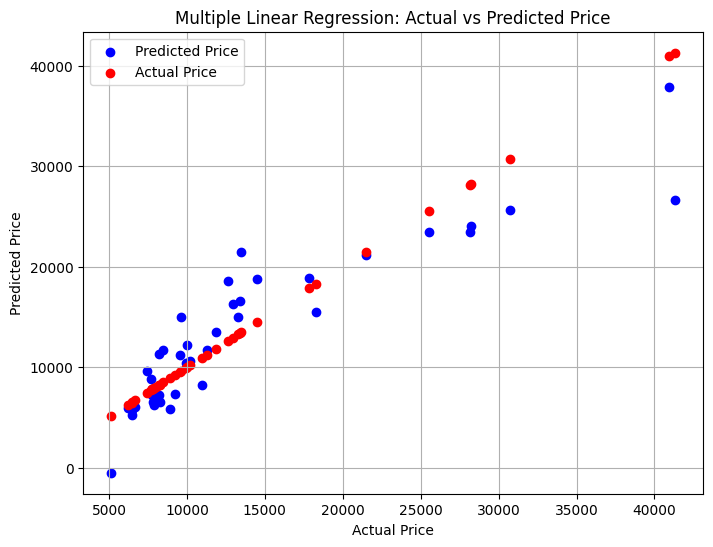

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the original dataset without brand extraction (keeping CarName as it is)
data = pd.read_csv('/content/CarPrice_Assignment.csv')

# Data Preprocessing without extracting the brand name
# Keeping 'CarName' as a categorical feature without extracting the brand
data = data.drop(columns=['car_ID'])  # Dropping car_ID as it's not useful

# Convert categorical columns (including CarName) to numerical using one-hot encoding
categorical_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Single Linear Regression (using enginesize as the feature)
X_single = data[['enginesize']]
y = data['price']
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Create and train the single linear regression model
single_model = LinearRegression()
single_model.fit(X_train_single, y_train_single)

# Predict on test data
y_pred_single = single_model.predict(X_test_single)

# Multiple Linear Regression using top correlated features
X_multi = data[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength']]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict on test data
y_pred_multi = multi_model.predict(X_test_multi)

# --- Plot for Single Linear Regression ---
plt.figure(figsize=(8, 6))
plt.scatter(X_test_single, y_test_single, color='blue', label='Actual')
plt.plot(X_test_single, y_pred_single, color='red', label='Predicted')
plt.title('Single Linear Regression: Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot for Multiple Linear Regression ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test_multi, y_pred_multi, color='blue', label='Predicted Price', marker='o')
plt.scatter(y_test_multi, y_test_multi, color='red', label='Actual Price', marker='o')
plt.title('Multiple Linear Regression: Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()


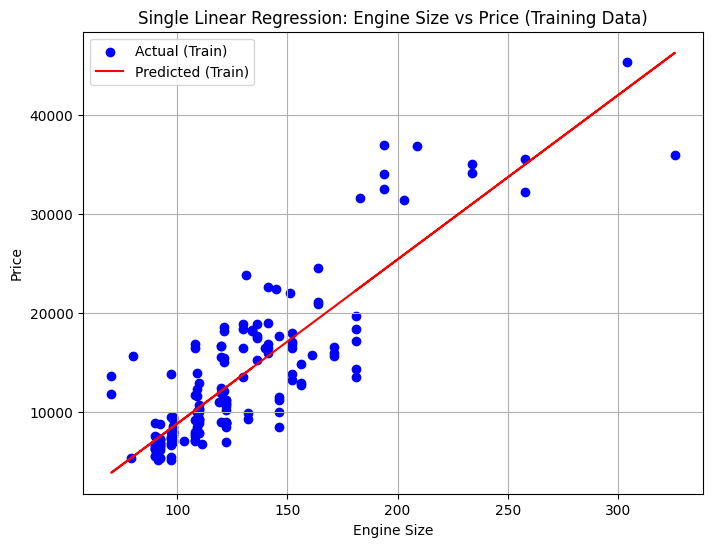

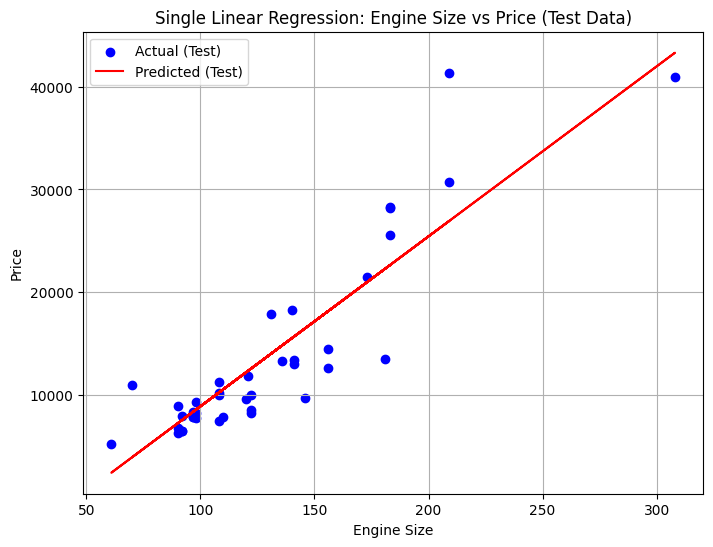

In [3]:
import matplotlib.pyplot as plt

# Training data plot for Single Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_train_single, y_train_single, color='blue', label='Actual (Train)')
plt.plot(X_train_single, single_model.predict(X_train_single), color='red', label='Predicted (Train)')
plt.title('Single Linear Regression: Engine Size vs Price (Training Data)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Test data plot for Single Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test_single, y_test_single, color='blue', label='Actual (Test)')
plt.plot(X_test_single, y_pred_single, color='red', label='Predicted (Test)')
plt.title('Single Linear Regression: Engine Size vs Price (Test Data)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


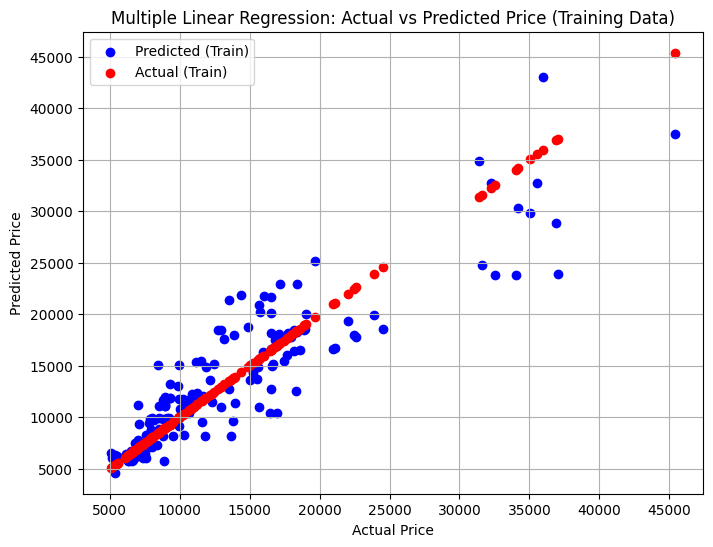

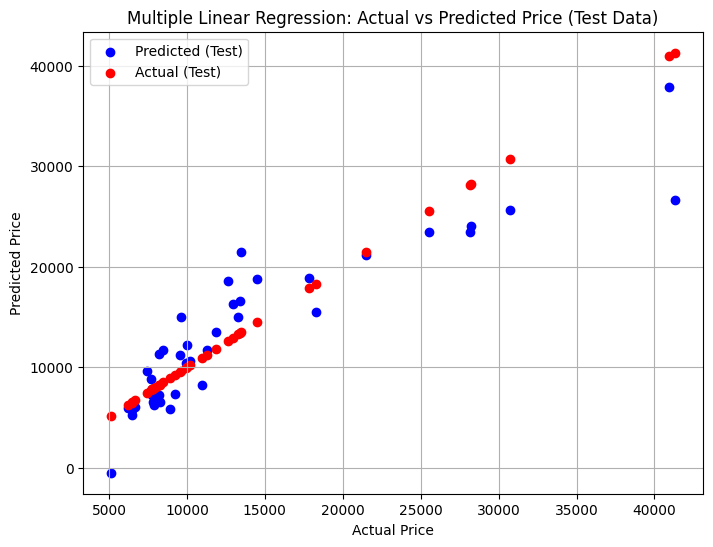

In [4]:
import matplotlib.pyplot as plt

# Training data plot for Multiple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_train_multi, multi_model.predict(X_train_multi), color='blue', label='Predicted (Train)', marker='o')
plt.scatter(y_train_multi, y_train_multi, color='red', label='Actual (Train)', marker='o')
plt.title('Multiple Linear Regression: Actual vs Predicted Price (Training Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

# Test data plot for Multiple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_multi, multi_model.predict(X_test_multi), color='blue', label='Predicted (Test)', marker='o')
plt.scatter(y_test_multi, y_test_multi, color='red', label='Actual (Test)', marker='o')
plt.title('Multiple Linear Regression: Actual vs Predicted Price (Test Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
print(single_model.predict([[130]]))

[13818.02806577]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
